In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import prince
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, cross_val_score, StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from IPython import display
from IPython.display import Image



In [3]:

data = pd.read_csv("./dataset.csv")
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Arbre de decision

In [6]:
X = data.drop('Target', axis=1)  
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))


Accuracy:  0.6915254237288135 

              precision    recall  f1-score   support

     Dropout       0.75      0.65      0.69       316
    Enrolled       0.39      0.42      0.40       151
    Graduate       0.76      0.82      0.79       418

    accuracy                           0.69       885
   macro avg       0.63      0.63      0.63       885
weighted avg       0.69      0.69      0.69       885



# Optimisation du modele

In [19]:
"""
# grille hyperparametres a tester
param_grid = {
    'max_depth': [6, 8, 10, 12, 15, 20, 30, 40],  
    'min_samples_split': [50, 100, 190, 200, 210, 225, 250],
    'min_samples_leaf': [15, 20, 25, 30, 40, 60, 100, 150],
    'criterion': ['gini', 'entropy']
}

best_score = 0
best_params = {}

# KFold
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# on itere pour toutes les combinaisons possibles des valeurs des hp
for criterion in param_grid['criterion']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                
                cv_scores = []
                #validation croisée manuelle
                for train_index, test_index in kf.split(X_train):
                    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

                    clf = DecisionTreeClassifier(
                        criterion=criterion,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        random_state=42  
                    )

                    
                    clf.fit(X_train_fold, y_train_fold)

                    # evaluation du modele
                    predictions = clf.predict(X_test_fold)
                    score = accuracy_score(y_test_fold, predictions)
                    cv_scores.append(score)

                # moyenne des scores de la validation croisee
                mean_score = np.mean(cv_scores)

                # met a jour le meilleur score et hp optimaux
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {
                        'criterion': criterion,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf
                    }

# entrainement du meilleur modele sur les donnees d'entrainement
best_tree = DecisionTreeClassifier(**best_params, random_state=42)
best_tree.fit(X_train, y_train)

# evaluation du meilleur modele
y_pred = best_tree.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print("meilleurs parametres: ", best_params)
print("moyenne des scores de validation croisée apres optimisation: ", best_score)
print("accuracy sur l'ensemble de test apres optimisation: ", final_accuracy)
print(classification_report(y_test, y_pred))
"""

meilleurs parametres:  {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 100, 'min_samples_leaf': 40}
moyenne des scores de validation croisée apres optimisation:  0.7572734111169795
accuracy sur l'ensemble de test apres optimisation:  0.7254237288135593
              precision    recall  f1-score   support

     Dropout       0.84      0.68      0.75       316
    Enrolled       0.39      0.25      0.31       151
    Graduate       0.73      0.93      0.82       418

    accuracy                           0.73       885
   macro avg       0.65      0.62      0.63       885
weighted avg       0.71      0.73      0.71       885



In [6]:

#les hyperparametres a tester
param_grid = {
    'max_depth': [6, 8, 10, 12, 15], 
    'min_samples_split': [50, 100, 190, 200, 210, 225, 250],
    'min_samples_leaf': [15, 20, 25, 30, 40, 60, 100, 150], 
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_


resultats = {
    'max_depth': [],
    'min_samples_split': [],
    'min_samples_leaf': [],
    'criterion': []
}
resultats['max_depth'].append(best_params.get('max_depth'))
resultats['min_samples_split'].append(best_params.get('min_samples_split'))
resultats['min_samples_leaf'].append(best_params.get('min_samples_leaf'))
resultats['criterion'].append(best_params.get('criterion'))



df = pd.DataFrame(resultats)
print('les hyperparametres optimaux:')
display.display(df)


#evaluation
best_model = grid_search.best_estimator_

best_cv_score = grid_search.best_score_
print(f'Moyenne des scores de validation croisé: {best_cv_score:.3f}\n')


y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur l'ensemble de test apres optimisation: {accuracy:.3f}\n")

print(classification_report(y_test, y_pred))

les hyperparametres optimaux:


,max_depth,min_samples_split,min_samples_leaf,criterion
0,6,210,15,gini


Moyenne des scores de validation croisé: 0.764

Accuracy sur l'ensemble de test apres optimisation: 0.739

              precision    recall  f1-score   support

     Dropout       0.81      0.71      0.75       316
    Enrolled       0.51      0.29      0.37       151
    Graduate       0.74      0.93      0.82       418

    accuracy                           0.74       885
   macro avg       0.69      0.64      0.65       885
weighted avg       0.73      0.74      0.72       885



                                          features  importance
28             Curricular units 2nd sem (approved)    0.751295
14                         Tuition fees up to date    0.086185
20             Curricular units 1st sem (enrolled)    0.048717
21          Curricular units 1st sem (evaluations)    0.032845
22             Curricular units 1st sem (approved)    0.022148
26             Curricular units 2nd sem (enrolled)    0.019458
17                               Age at enrollment    0.009699
23                Curricular units 1st sem (grade)    0.008552
3                                           Course    0.008135
27          Curricular units 2nd sem (evaluations)    0.007697
32                                  Inflation rate    0.005041
1                                 Application mode    0.000228
29                Curricular units 2nd sem (grade)    0.000000
19             Curricular units 1st sem (credited)    0.000000
25             Curricular units 2nd sem (credited)    0

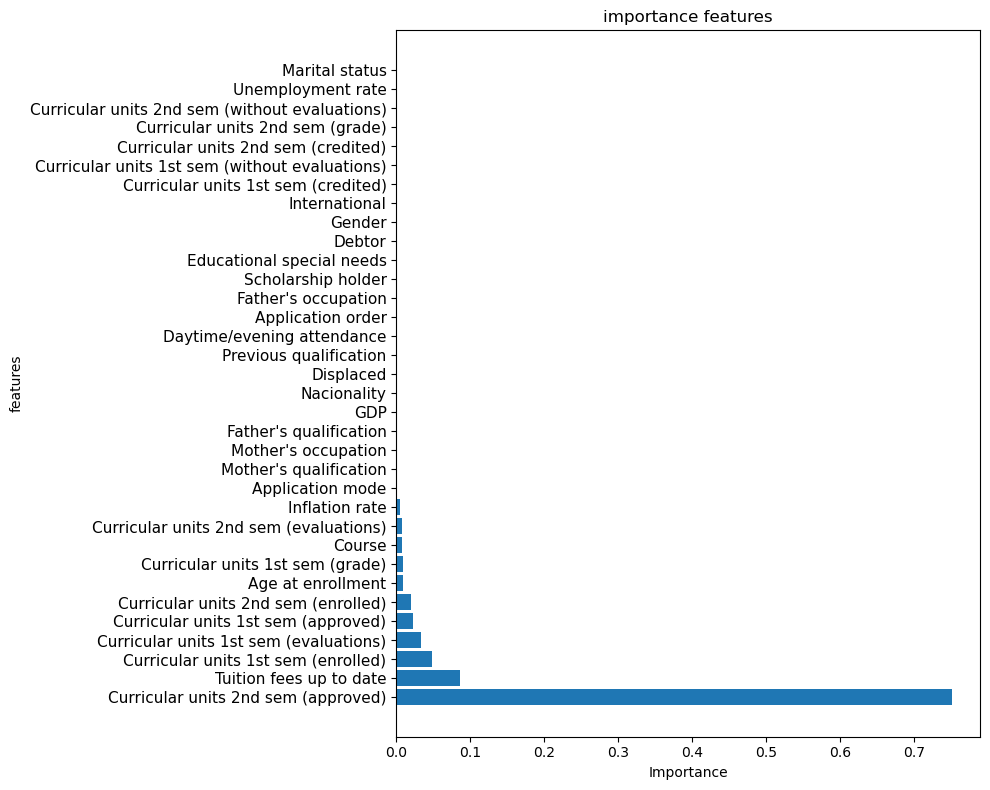

In [5]:
# extraire les features importantes
feature_importances = best_model.feature_importances_
features = X.columns
important_features = pd.DataFrame({'features': features, 'importance': feature_importances})
print(important_features.sort_values(by='importance', ascending=False))


indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 8))
plt.title('importance features')
plt.barh(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), features[indices], fontsize=11)
plt.xlabel('Importance')
plt.ylabel('features')
plt.tight_layout()
plt.show()



# Voir l'arbre

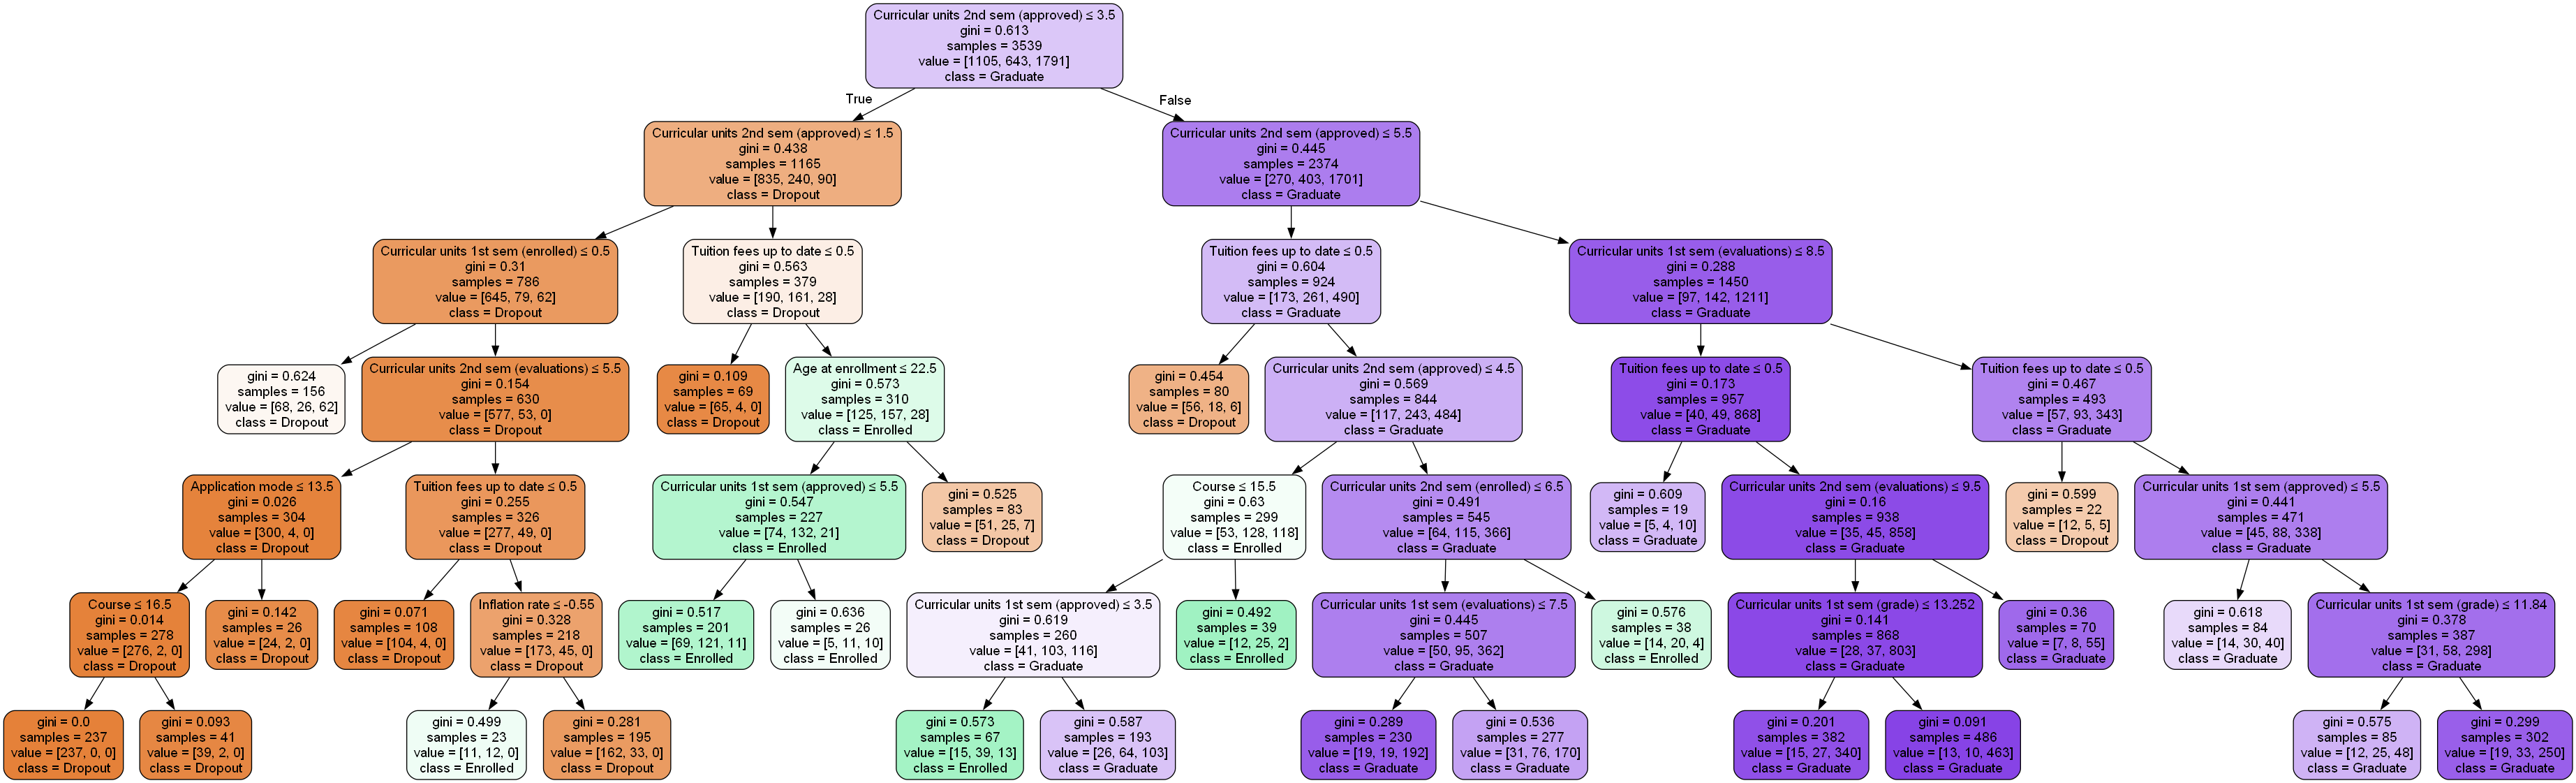

In [7]:

# un modele DT avec les meilleurs hp
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    min_samples_split=210,
    min_samples_leaf=15,
    random_state=42
)

clf.fit(X_train, y_train)

class_names = [str(x) for x in clf.classes_]
dot_data = export_graphviz(
    clf, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=class_names, 
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("Arbre de decision") 

Image(graph.pipe(format='png'))


## suppression de la classe Enrolled, avec objectif de seulement predire si un etudiant abandonnera ses etudes ou les terminera

In [13]:

filtered_data = data[data['Target'] != 'Enrolled']
filtered_data

X_filtered = filtered_data.drop('Target', axis=1)
y_filtered = filtered_data['Target']
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_filtered, y_train_filtered)

y_pred = clf.predict(X_test_filtered)

print("Accuracy: ", accuracy_score(y_test_filtered, y_pred), "\n")
print(classification_report(y_test_filtered, y_pred))

Accuracy:  0.8402203856749312 

              precision    recall  f1-score   support

     Dropout       0.78      0.81      0.79       277
    Graduate       0.88      0.86      0.87       449

    accuracy                           0.84       726
   macro avg       0.83      0.83      0.83       726
weighted avg       0.84      0.84      0.84       726



In [14]:
# Optimisation

param_grid = {
    'max_depth': [6, 8, 10, 12, 15], 
    'min_samples_split': [50, 100, 190, 200, 210, 225, 250],
    'min_samples_leaf': [15, 20, 25, 30, 40, 60, 100, 150], 
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_filtered, y_train_filtered)
best_params = grid_search.best_params_

resultats = {
    'max_depth': [],
    'min_samples_split': [],
    'min_samples_leaf': [],
    'criterion': []
}
resultats['max_depth'].append(best_params.get('max_depth'))
resultats['min_samples_split'].append(best_params.get('min_samples_split'))
resultats['min_samples_leaf'].append(best_params.get('min_samples_leaf'))
resultats['criterion'].append(best_params.get('criterion'))


df = pd.DataFrame(resultats)
print('les hyperparametres optimaux:')
display.display(df)


#evaluation
best_model = grid_search.best_estimator_
best_cv_score = grid_search.best_score_
print(f'Moyenne des scores de validation croisé: {best_cv_score:.3f}\n')


y_pred = best_model.predict(X_test_filtered)
accuracy = accuracy_score(y_test_filtered, y_pred)
print(f"Accuracy sur l'ensemble de test apres optimisation: {accuracy:.3f}\n")
print(classification_report(y_test_filtered, y_pred))

les hyperparametres optimaux:


,max_depth,min_samples_split,min_samples_leaf,criterion
0,6,100,15,entropy


Moyenne des scores de validation croisé: 0.894

Accuracy sur l'ensemble de test apres optimisation: 0.894

              precision    recall  f1-score   support

     Dropout       0.91      0.81      0.85       277
    Graduate       0.89      0.95      0.92       449

    accuracy                           0.89       726
   macro avg       0.90      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



### test: selection de juste quelques features, avec methode SelectFromModel

In [8]:

X = data.drop('Target', axis=1)  
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

selector = SelectFromModel(clf, prefit=True, threshold='mean')
X_train_reduced = selector.transform(X_train)  
X_test_reduced = selector.transform(X_test)  


param_grid = {
    'max_depth': [6, 8, 10, 12, 15], 
    'min_samples_split': [50, 100, 190, 200, 210, 225, 250],
    'min_samples_leaf': [15, 20, 25, 30, 40, 60, 100, 150], 
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_reduced, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_cv_score = grid_search.best_score_
print(f'Moyenne des scores de validation croisé: {best_cv_score:.2f}\n')

y_pred_test = best_model.predict(X_test_reduced)
print("Accuracy sur l'ensemble de test: ", accuracy_score(y_test, y_pred_test))


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Moyenne des scores de validation croisé: 0.75


Accuracy sur l'ensemble de test:  0.7265536723163842


#### test: selection de juste quelques features, avec methode SelectKBest

In [9]:
best_k = None
best_accuracy = 0
for k in range(1, X_train.shape[1] + 1):

    selector = SelectKBest(f_classif, k=k).fit(X_train, y_train)
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)

    model = DecisionTreeClassifier(random_state=42).fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"Meilleur nbre de features : {best_k} avec une accuracy de {best_accuracy:.2%}")

selected_indices = selector.get_support(indices=True)

selected_features_names = X.columns[selected_indices]
#print("features selectionnés :")
#for feature in selected_features_names:
#    print(feature)


selector = SelectKBest(f_classif, k=best_k).fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)


param_grid = {
    'max_depth': [6, 8, 10, 12, 15], 
    'min_samples_split': [50, 100, 190, 200, 210, 225, 250],
    'min_samples_leaf': [15, 20, 25, 30, 40, 60, 100, 150], 
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

best_model = grid_search.best_estimator_

best_cv_score = grid_search.best_score_
print(f'Moyenne des scores de validation croisé: {best_cv_score:.2f}\n')


y_pred = best_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur l'ensemble de test: {accuracy:.2%}")

Meilleur nbre de features : 24 avec une accuracy de 70.06%
Moyenne des scores de validation croisé: 0.76

Accuracy sur l'ensemble de test: 73.67%


#### test: utiliser One-Hot-Encoding pour transformer les variables nominales categorielles en colonne binaires 0 ou 1

In [10]:
#les colonnes categorielle
colonnes_categorelles = ['Marital status', 'Application mode', 'Course', 'Gender', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Educational special needs', 'Displaced', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International'] 

#One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=colonnes_categorelles)

X2 = data_encoded.drop('Target', axis=1)
y2 = data_encoded['Target']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [6, 8, 10, 12, 15], 
    'min_samples_split': [50, 100, 190, 200, 210, 225, 250],
    'min_samples_leaf': [15, 20, 25, 30, 40, 60, 100, 150], 
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train2, y_train2)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_cv_score = grid_search.best_score_
print(f'Moyenne des scores de validation croisé: {best_cv_score:.2f}\n')

y_pred2 = best_model.predict(X_test2)
print("Accuracy sur l'ensemble de test: ", accuracy_score(y_test2, y_pred2))


Moyenne des scores de validation croisé: 0.76

Accuracy sur l'ensemble de test:  0.7333333333333333


#### test: les classes sont un peu desequilibrés. Echantillonnage oversampling avec SMOTE pour reequilibrer la distribution des classes

In [12]:

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'clf__max_depth': [6, 8, 10, 12, 15],    
    'clf__min_samples_split': [50, 100, 190, 200, 210, 225, 250], 
    'clf__min_samples_leaf': [15, 20, 25, 30, 40, 60, 100, 150], 
    'clf__criterion': ['gini', 'entropy'],
    'clf__splitter': ['best', 'random']
}


grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("meilleurs params:", grid_search.best_params_)

best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


meilleurs paramètres: {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_leaf': 150, 'clf__min_samples_split': 50, 'clf__splitter': 'best'}
accuracy: 0.6937853107344633
              precision    recall  f1-score   support

     Dropout       0.85      0.62      0.71       316
    Enrolled       0.36      0.54      0.43       151
    Graduate       0.79      0.81      0.80       418

    accuracy                           0.69       885
   macro avg       0.66      0.65      0.65       885
weighted avg       0.74      0.69      0.71       885



#### test: les classes sont un peu desequilibrés. Echantillonnage undersampling avec pour reequilibrer la distribution des classes

In [7]:
pipeline = Pipeline([
    ('sampling', RandomUnderSampler(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'clf__max_depth': [6, 8, 10, 12, 15],    
    'clf__min_samples_split': [50, 100, 190, 200, 210, 225, 250], 
    'clf__min_samples_leaf': [15, 20, 25, 30, 40, 60, 100, 150], 
    'clf__criterion': ['gini', 'entropy'],
    'clf__splitter': ['best', 'random']
}


grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("meilleurs params:", grid_search.best_params_)

best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



meilleurs params: {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_leaf': 25, 'clf__min_samples_split': 190, 'clf__splitter': 'random'}
accuracy: 0.6858757062146893
              precision    recall  f1-score   support

     Dropout       0.85      0.61      0.71       316
    Enrolled       0.34      0.56      0.43       151
    Graduate       0.80      0.79      0.79       418

    accuracy                           0.69       885
   macro avg       0.66      0.65      0.64       885
weighted avg       0.74      0.69      0.70       885

